In [1]:
import MDAnalysis as mda
import ARPDF, utils, search_boxes
import importlib
import matplotlib.pyplot as plt
import torch
from optimize_ARPDF import ARPDFOptimizer
import pandas as pd


importlib.reload(search_boxes)
importlib.reload(ARPDF)
importlib.reload(utils)
from ARPDF import *
from utils import *
from search_boxes import workflow_demo

/opt/mamba/envs/arpdf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/mamba/envs/arpdf/lib/python3.12/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [13]:
X, Y, ARPDF_exp = utils.load_exp_data('data/CCl4', rmax=9.0)
print(X)

[[-8.992133 -8.925525 -8.858916 ...  8.858916  8.925525  8.992133]
 [-8.992133 -8.925525 -8.858916 ...  8.858916  8.925525  8.992133]
 [-8.992133 -8.925525 -8.858916 ...  8.858916  8.925525  8.992133]
 ...
 [-8.992133 -8.925525 -8.858916 ...  8.858916  8.925525  8.992133]
 [-8.992133 -8.925525 -8.858916 ...  8.858916  8.925525  8.992133]
 [-8.992133 -8.925525 -8.858916 ...  8.858916  8.925525  8.992133]]


In [23]:
X, Y, ARPDF_exp = utils.load_exp_data('data/CCl4', rmax=9.0)
filter_fourier = lambda kX, kY, xp: (1 - xp.exp(-(kX**2 / 0.3 + kY**2 / 0.15))) * xp.exp(-0.045 * (kX**2 + kY**2))
#filter_fourier = lambda kX, kY, xp: xp.ones_like(kX)

sigma0 = 0.4
neg = False
print(f"sigma0 = {sigma0}")

sigma0 = 0.4


In [24]:
ARPDF_ref = ARPDF_exp

已生成过滤并重命名后的文件: data/CCl4/CCl4_clean.gro


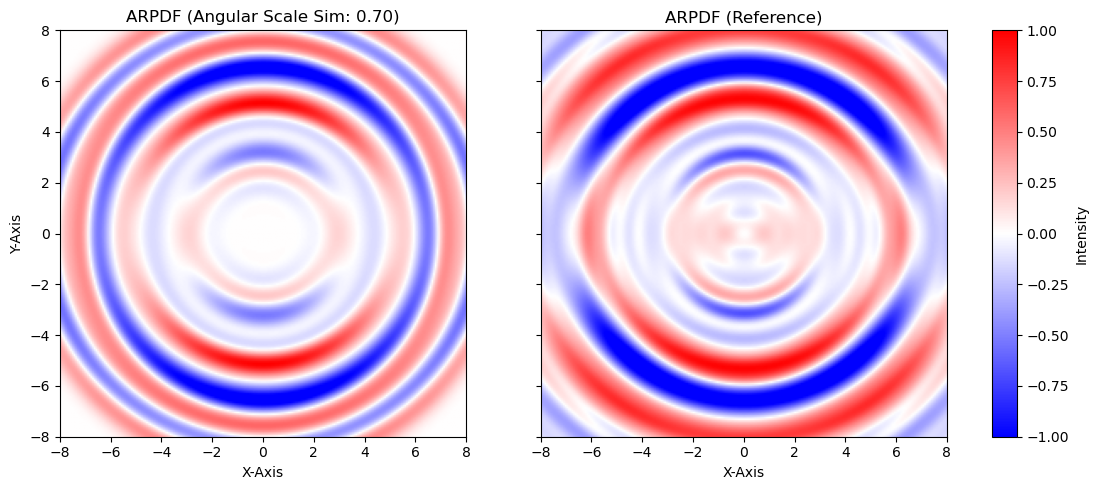

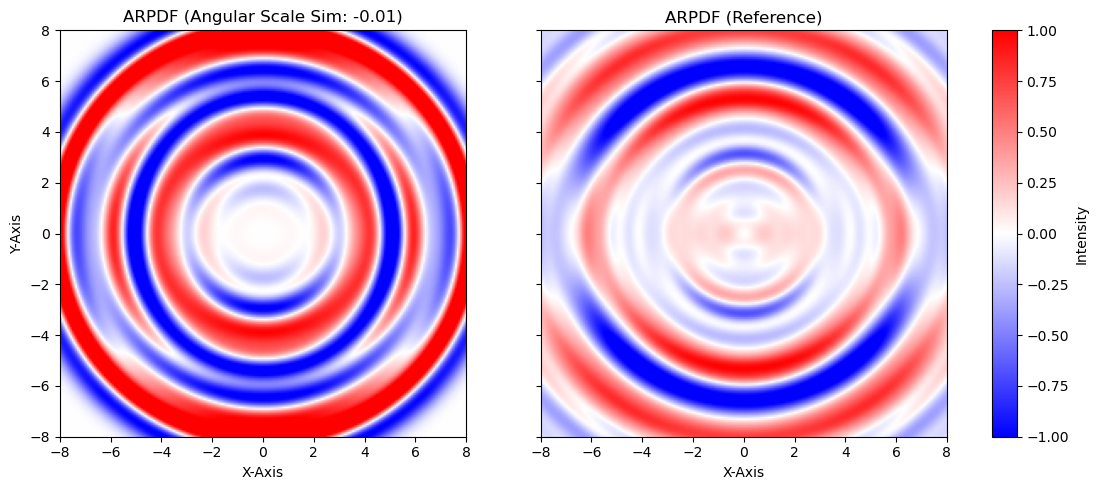

In [25]:
workflow_demo(
    X, Y, ARPDF_ref,
    filter_fourier, 
    sigma0,  
    exp_name="exp_experiment_precise_angular_scale_3nm_cutoff_5", 
    metric="angular_scale", 
    stretch_distances=[round(1.0 + 0.1 * i, 1) for i in range(15)], 
    weight_cutoff=5.0, 
    neg=neg
)